![binary](https://images.squarespace-cdn.com/content/v1/54bf12d2e4b0f0d81bf74ee7/1511920152230-7K47P4HDHI1VQW8A3FFW/ke17ZwdGBToddI8pDm48kPO1qH2bcF1Kr_6x8CgfCmF7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z4YTzHvnKhyp6Da-NYroOW3ZGjoBKy3azqku80C789l0hveExjbswnAj1UrRPScjfAeXU04AODiXBTV9huNJHLYWb4Zdre9KJgkl0xNa9aDhg/209598main_keckart_HI.jpg?format=750w)
# *Evolving your own binary*

## Goals and overview

Outside of its main tool, the `cosmic-pop` executable, COSMIC contains a multitude of modules and cool tools that you can use however you feel like. Notably, there is a whole `evolve` class that comes with a number of sub-modules beyond the standard ones used when running `cosmic-pop`.

In this notebook, we'll explore some of what can be done with those tools.

We start by installing `cosmic 3.2.0` on the notebook.


In [0]:
!pip install -q cosmic-popsynth==3.2.0

In [0]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve

## Single Binary

You'll need to specify some initial parameters and park them in an `InitialBinaryTable`. Namely, those parameters are:

*    `m1` and `m2`, or the ZAMS masses of the primary and secondary stars in $M_{\odot}$
*    `porb`, the initial orbital period in days
*    `ecc`, the initial eccentricity
*    `tphysf`, or the total evolution time in $Myr$ -- how long to evolve them for.
*    `kstar1` and `kstar2`, the initial stellar types of each star -- the value follows the convention outlined in the documentation.
*    `metallicity` fraction, knowing that e.g. $Z_{\odot}=0.02$




In [0]:
single_binary = InitialBinaryTable.InitialBinaries(m1=85.543645, m2=84.99784, porb=446.795757, ecc=0.448872, 
                                                   tphysf=13700.0, kstar1=1, kstar2=1, metallicity=0.002)
single_binary

,kstar_1,kstar_2,mass1_binary,mass2_binary,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,rad1,rad2,lumin1,lumin2,massc1,massc2,radc1,radc2,menv1,menv2,renv1,renv2,ospin1,ospin2,b_0_1,b_0_2,bacc1,bacc2,tacc1,tacc2,epoch1,epoch2,tms1,tms2,bhspin1,bhspin2,tphys,binfrac
0,1.0,1.0,85.543645,84.99784,446.795757,0.448872,0.002,13700.0,85.543645,84.99784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Now, you have to specify what evolutionary model you want your binary to follow by providing a `BSE` dictionary. If you don't know what that entails, just take this one.

In [0]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 
           'hewind': 0.5, 'ck': -1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'nsflag': 3, 'ceflag': 0, 
           'eddfac': 1.0, 'ifflag': 0, 'bconst': -3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [-100.0,-100.0,-100.0,-100.0,-100.0,-100.0], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2,
           'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1}

Let's evolve this baby!

In [0]:
bpp, bcm, initC = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

COSMIC provides us with some built-in plotting tools. Namely, this one takes as argument your initial binary table, the `BSEDict` you've already defined (so no need to call it again). 

You can also provide limits on the timeframe you want plotted. I set `t_max` to be equal to `6.0` for that particular binary, because all the interesting stuff happens before that anyway. As a general rule though, you should set the limits to `None` first, and then adapt from there.

In [0]:
from cosmic.plotting import evolve_and_plot

/usr/local/lib/python3.6/dist-packages/cosmic/plotting.py:497: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(5, 1, figsize=(10,10))
/usr/local/lib/python3.6/dist-packages/cosmic/plotting.py:536: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)


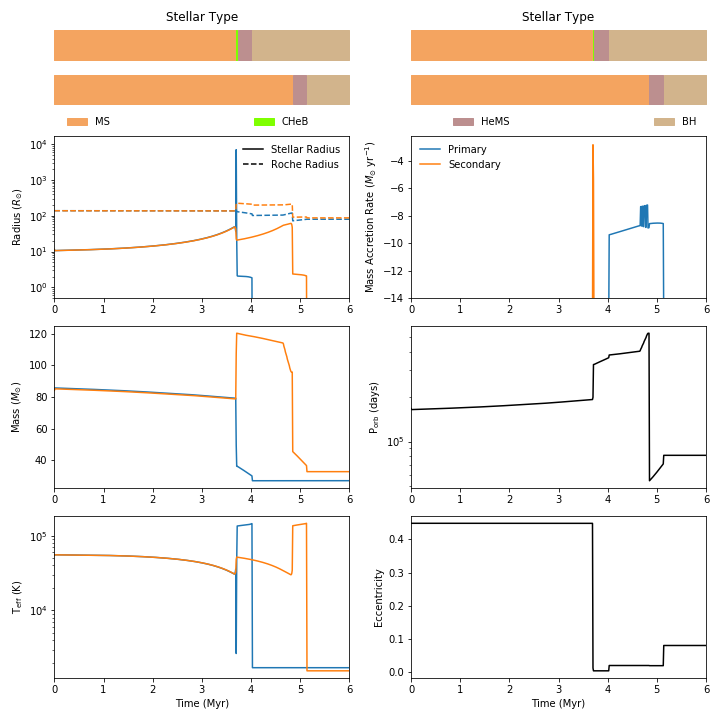

In [0]:
fig = evolve_and_plot(initC, t_min=None, t_max=6.0, BSEDict={}, sys_obs={})

import matplotlib.pyplot as plt
plt.savefig("single_binary.png")

from IPython.display import Image, display
Image("single_binary.png")

Run this line if you'd like the file saved to your computer.

In [0]:
from google.colab import files
files.download("single_binary.png")


## Double Binary

The `evolve` function (as well as the `evolve + plot` one!) can take lists as arguments as well, allowing you to evolve jointly anywhere from 2 to about 10 binaries (I don't recommend going too crazy with it).

In [0]:
double_binary = InitialBinaryTable.InitialBinaries(m1=[85.543645, 11.171469], m2=[84.99784, 6.67305], 
                                                  porb=[446.795757, 170.758343], ecc=[0.448872, 0.370], 
                                                  tphysf=[13700.0, 13700.0], kstar1=[1, 1], kstar2=[1, 1], 
                                                  metallicity=[0.002, 0.02])

In [0]:
all_fig = evolve_and_plot(double_binary, t_min=None, t_max=[5,50], BSEDict=BSEDict, sys_obs={})
import matplotlib.pyplot as plt

for i, fig in enumerate(all_fig):
    fig.savefig('binary_%d.png' % i)

/usr/local/lib/python3.6/dist-packages/cosmic/plotting.py:497: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(5, 1, figsize=(10,10))
/usr/local/lib/python3.6/dist-packages/cosmic/plotting.py:536: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)


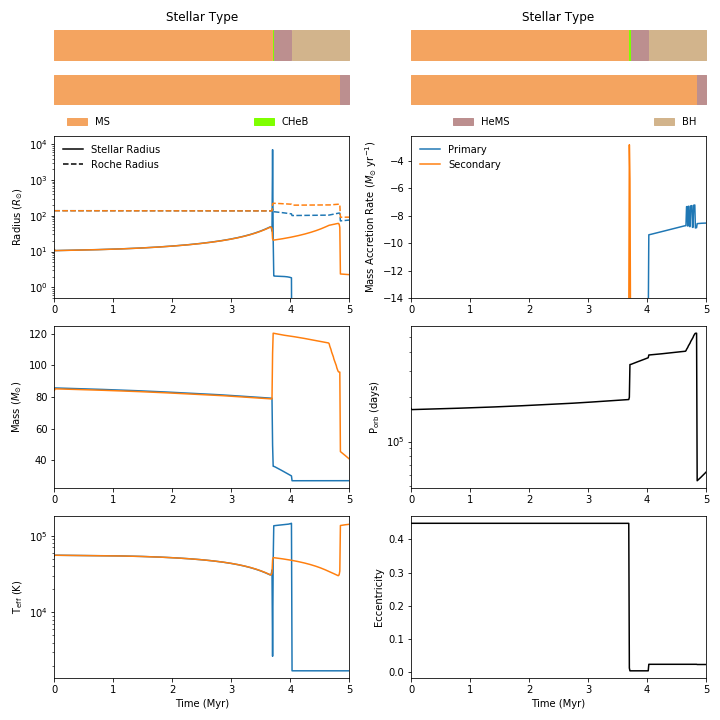

In [0]:
Image("binary_0.png")

Again, run the following line if you'd like the image files saved to your computer.


In [0]:
for i, fig in enumerate(all_fig):
    files.download('binary_%d.png' % i)